This post offers an introduction to most commonly used data distributions in data science. The post start by explaining what does it mean by data distribution and then dive deep into different data distributions.

## What is data distribution?
Let's now understand what is the meaning of data distribution. In data science projects, we work on different types of datasets and those datasets come from somewhere. For example, a dataset containing salary information of the employees come from a population of employees working at a particular company. In the dataset, there would be some values occuring quite frequently while some rarely. **Data distribution enables an understanding of such likelihood of data values**. 

Let's take an example of such dataset.
```
    # salary in thousands
    salary = [1500,1200,1500,1300,1500,2100,2800,2500,1500,2100]

```

In the above example, we can see that the most frequently occuring salary is `1500`. In other terms, there is a higher likelihood that a person would be receiving a salary of 1500. This is what we aim to study by data distribution, i.e., how the values are distributed or what are their likelihood?

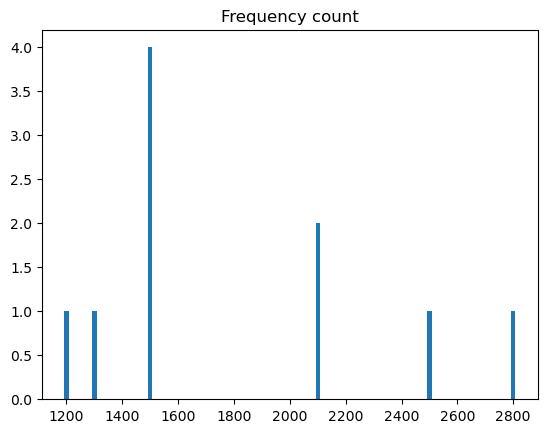

In [8]:
import matplotlib.pyplot as plt
from collections import Counter

# counting frequencies
count_freq = dict(Counter(salary))

# salary data
salary = [1500,1200,1500,1300,1500,2100,2800,2500,1500,2100]

# plotting distribution
plt.bar(count_freq.keys(),count_freq.values(),width=15)
plt.title('Frequency count')
plt.show()

If we are asked what percentage of times a salary of 1500 occurred in the dataset then we can answer **40%** (Why: 4 out of 10 salaries were 1500)

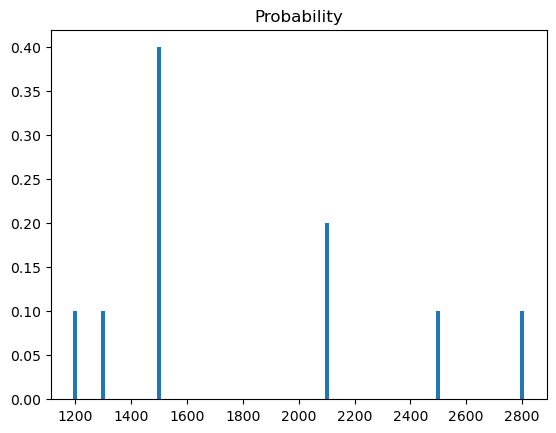

In [11]:
# plotting distribution
plt.bar(count_freq.keys(),[item/len(salary) for item in count_freq.values()],width=15)
plt.title('Probability')
plt.show()

With this figure, we can answer questions like
1. **what are the chances of a person having salary less than 1500 euros?**
2. **What are the chances of a personal having a salary of 2800 euros?**

These are just a few examples. Data distribution helps to answer such questions. In a simple term, **data distribution is a function which maps the value occuring in the dataset to its corresponding likelihood of appearing in the dataset.**

For example, $$P(1500) = .4$$

Data distribution depends on the type of numeric values, that is divided into two categories: 
Discrete and Continuous.
    
In this blog post, we will focus on discrete data distributions.

# Bernoulli distribution


Think about a situation where there are two possible outcomes and you are interested in knowing the chance of happening those outcomes. 

For example, consider an example of applying for a job which can lead to an offer or a rejection. All such events, having two possible outcomes, can be modeled using Bernoulli distribution. The outcomes can be termed as **success** and **failure**, and can be represented numerically as 1 and 0, respectively.


\begin{align*}
P(x) = 
\left\{
    \begin {aligned}
         & p  & x = 1 \\
         & 1-p  & x = 0                  
    \end{aligned}
\right.
\end{align*}
Here, $p$ is the probability of success.


Let's take our previous example: You have 25% chances of getting a job given your education level and experiences. In this case, the value of p is .4 that makes 1-p = .6.

Text(0.5, 0, 'Outcomes')

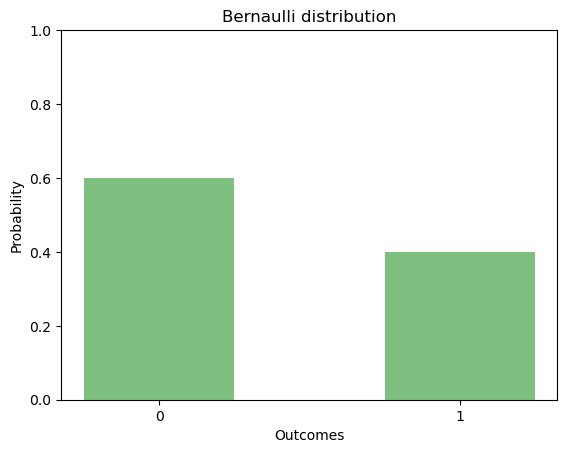

In [27]:
plt.bar([0,1],[.6,.4],color='green',alpha=.5,width=.5)
plt.xticks([0,1],[0,1])
plt.ylim([0,1])
plt.title('Bernaulli distribution')
plt.ylabel('Probability')
plt.xlabel('Outcomes')

Let's extend our example of job application. Now, **you are interested in knowing the chances of getting a particular number of job offers** after applying for N job positions.

Here comes our next data distributions, Binomial.

# Binomial distribution
Binomial distribution is used to model a situation where N Bernaulli trials are performed. In other words, we have an event with two possible outcomes (0 and 1) and the event is repeated N times. 

Binomial distribution is characterised by two parameters, $N$ and $\theta$ (or $p$). N is the number of trials, and $\theta$ is the probability of 'success' or $x=1$.

Consider our previous example of job applications. A person with the 30% chance of getting a job sent 10 job applications. We are interested in knowing what are the odds that that person would get 5 job offers.

Here, $N = 10$ and $p = .3$ 

Now, we need to compute the probability of that **person getting 5 job offers out of 10 job applications**.


In [44]:
from itertools import product
from collections import Counter

outcomes = list(product('SF',repeat=10))
outcomes_5 = []

for outcome in outcomes:
    if Counter(outcome)['S'] == 5:
        outcomes_5.append(outcome)
    
print('Total possible outcomes:',len(outcomes))
print('Outcomes with 5 successes:',len(outcomes_5))

Total possible outcomes: 1024
Outcomes with 5 successes: 252


The above code illustrates that there are 1024 ways in which the results of 10 job applications could be. Among those outcomes, there are 254 times the candidate gets 5 job offers.

:::{.callout-tip}
    
    It might be tempting for you to simply divide 1024 by 254 to get the probability measure. But this measure will only works when the probability of success and failure are same, i.e., p = .5.
    
:::

Let's move to the formula for computing this probability. The formula in simple terms is given below

:::{.callout-important}

  $P(X=x)$ = Number of ways event can occur * P(one occurrence)

:::

In our example, the outcome resulting in getting the job corresponds to success while getting a rejection correspond to failure. Now, there could be a number of ways in which the results of 10 job applications could be. The following one is just one of them of our interest (5 successes).
```
         S S S S S F F F F F
```

We know that $p = .3$ (previously mentioned that the person has 30% chance) that makes $q = 1 - p = .7$. Now, in the above sequence of outcomes, there are 5 successes and 5 failures. The probability would be

$$ P = p*p*p*p*p*q*q*q*q*q $$
$$ P = p^5 * q^5 $$
$$ P = p^r * q^{n-r}$$

Here, r is the number of success

Now, we just need to find out **how many ways are there in which there are 5 successes** (e.g., another way could be S S S S F F F S F F).
Here, we will use the following known as **"n choose r"**.

$$ \left(
    \begin {aligned}
         n \\
         r                 
    \end{aligned}
\right)  = \frac{n!}{r!\,(n-r)!} 
$$

Here, $!n$ is factorial of $n$ defined as
$$ !n = n * (n-1) * (n-2) * ... 2 * 1 $$

Now, we have knowledge on how may outcomes are there having r successes, and what is the probability of each of those outcomes. The following is the formula for Binomial distribution 

$$  \left(
    \begin {aligned}
         n \\
         r                 
    \end{aligned} 
\right) p^r * q^{n-r}$$

Let's put the values in the formula for computing the probability of getting 5 job offers out of 10 with $p=.3$.

$$  \left(
    \begin {aligned}
         10 \\
         5                 
    \end{aligned} 
\right) .3^5 * .7^5 $$
$$  252 * .0024 * .16 $$
$$ .09 $$

There is **9% chances that the candidate will get 5 job offers out of 10 job application with $p=.3$**.

## Plotting binomial distribution
Let's now plot the binomial distribution. The figure [@fig-bino] shows two different binomial distributions. A binomial distribution with $p=.5$ is symmetrical.


In [46]:
def binomial_p(n,p,r):
    number_of_ways = math.factorial(n)/(math.factorial(r)*math.factorial(n-r))
    success_p = pow(p,r)
    failure_p = pow((1-p),(n-r))
    return number_of_ways * success_p * failure_p

def plot_binomial(n,p):
    x_data = []
    y_data = []
    
    for i in range(n):
        x_data.append(i)
        y_data.append(binomial_p(n,p,i))
        
    plt.bar(x_data,y_data,width=.5)
    #plt.title(f'n={n} p={p}')
    plt.show()
    

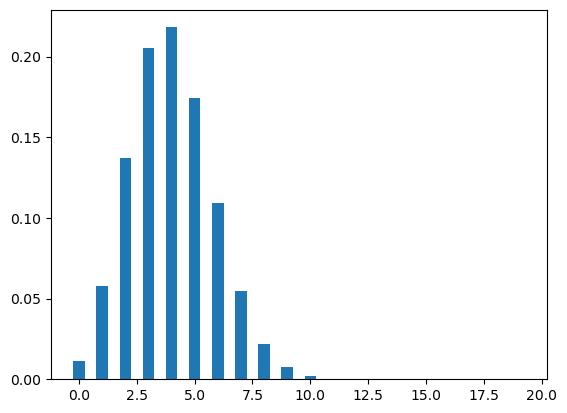

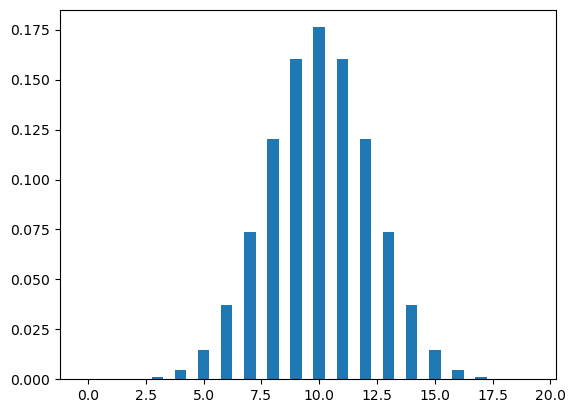

In [55]:
#| label: fig-bino
#| fig-cap: "Binomial distribution with different n,p"
#| fig-subcap: 
#|   - "n=20 p=.2"
#|   - "n=20 p=.5"
#| layout-ncol: 2
plot_binomial(20,.2)
plot_binomial(20,.5)

In [ ]:
# Geometric distribution


In [73]:
def geo_p(k,p):
    number_of_ways = math.factorial(k)/(math.factorial(k-1))
    success_p = p
    failure_p = pow((1-p),(k-1))
    return number_of_ways * success_p * failure_p

def plot_geo(n,p):
    x_data = []
    y_data = []
    
    for i in range(1,n+1):
        x_data.append(i)
        y_data.append(geo_p(i,p))
    plt.bar(x_data,y_data,width=.5)
    plt.ylim([0,1])
    #plt.title(f'n={n} p={p}')
    plt.show()


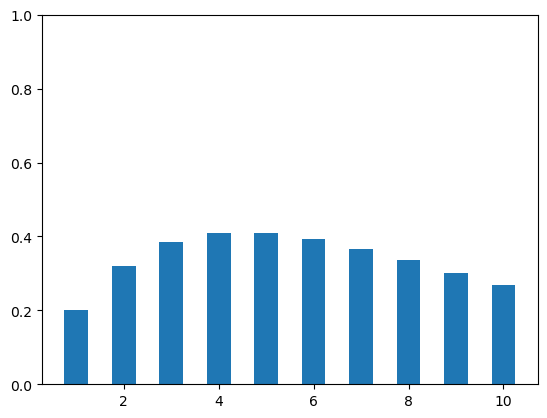

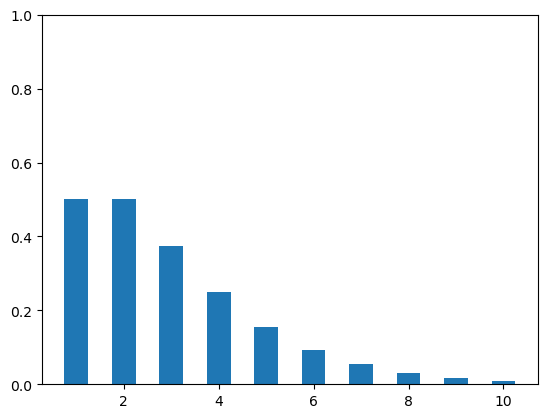

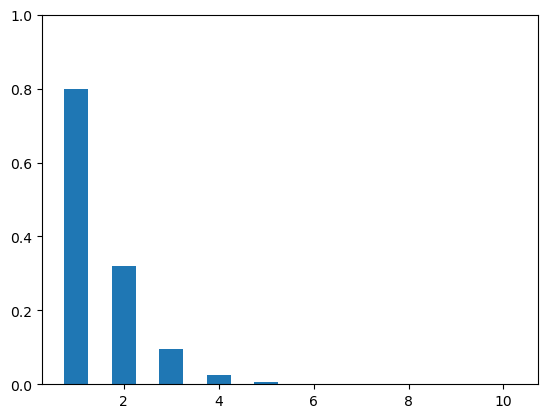

In [74]:
#| label: fig-geo
#| fig-cap: "Geometric distribution with different n,p"
#| fig-subcap: 
#|   - "n=20 p=.2"
#|   - "n=20 p=.5"
#| layout-ncol: 2
plot_geo(10,.2)
plot_geo(10,.5)
plot_geo(10,.8)

# References
1. https://www3.nd.edu/~rwilliam/stats1/x13.pdf